### Welcome to interview simulator.

# Needed infos 

First we'll need a resume of the job seeker. We'll use the pdf format at first, monst commonly used.
Second, a paste of the job search post. 


# Techno used :

Mainly based on the llm through the libraries langchain, langgraph and langsmith.
At first we'll use a notebook to configure and test the design of the differents parts of the workflow.
Next, we'll build the workflow mith langgraph
Then, we'll use "deep_note" and streamlit to make the final tool

## Load the specifics tools 

In [1]:
from tools.job_and_resume import extract_text_from_pdf
from flow_tools.nodes import Flow, Interview_State

## Load the API keys

In [3]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")
_set_env("TAVILY_API_KEY")

# 0- Init the flow

First I will work with the most classic openai, gpt-4o-mini. I love the ollama deepseek-r1 mais il est si lent à tourner en local.
Peut être à faire évoluer vers du cloud.



In [4]:
flow = Flow()
#llm=ChatOllama(model="deepseek-r1")

# 1- load the sources pdf 

## 1-1 Load the resume

Test CV

In [5]:
resume = extract_text_from_pdf("./data_test/proba.pdf")
print(resume[0][:100])

IndexError: list index out of range

## 1-2 Load the job announcement

In [152]:
from langgraph.graph import StateGraph, START, END


# Build graph
builder = StateGraph(Interview_State)
builder.add_node("prepare_interview", flow.prepare_interview)
builder.add_node("question_to_candidate", flow.question_to_candidate)
builder.add_node("candidate_response", flow.candidate_response)
builder.add_node("modify_state", flow.modify_interview_state)  # Nouveau nœud
builder.add_node("generate_cover_letter", flow.generate_cover_letter)
builder.add_node("evaluate_candidate", flow.evaluate_candidate)
builder.add_node("search_infos", flow.search_infos)

# Logic
builder.add_edge(START, "prepare_interview")
builder.add_edge("prepare_interview", "question_to_candidate")
builder.add_edge("question_to_candidate", "candidate_response")

# Ajout de la modification d'état après la réponse du candidat
builder.add_edge("candidate_response", "modify_state")

builder.add_conditional_edges("modify_state", flow.test_end)
builder.add_edge("search_infos", "generate_cover_letter")
builder.add_edge("generate_cover_letter", "evaluate_candidate")
builder.add_edge("evaluate_candidate", END)

# Compile
graph = builder.compile()
# View


## 4-2 Affichage du graph

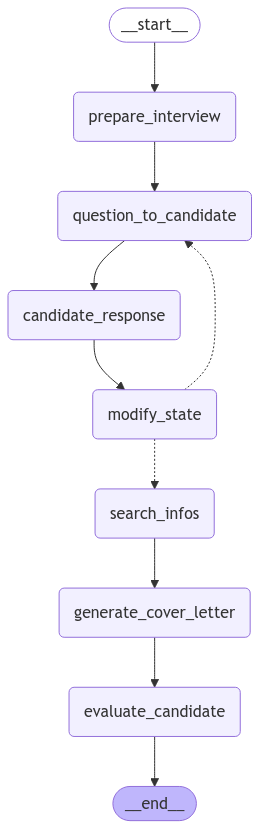

In [153]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

## 4-3 Invocation du graph

In [154]:
graph.invoke({"resume" : resume, "job_description": job_description_2}, {"recursion_limit": 100})

inter


TypeError: Flow.question_to_candidate() takes 1 positional argument but 2 were given